# Introduction
In this homework I:
1. Chose 4 tickers - Facebook, Apple, Amazon and Netflix **(FB, AAPL, AMZN, NFLX)** between the dates **1/1/2018 and 6-1-2021**.
1. Was given a simple moving average (SMA) strategy of 50 and 200 days respectively.
1. Was tasked to find strategy, in which the SMA strategy that performs better than the one described above
1. Used a loop to assess various nubmer of days and chose **10 for short** and **350 for long**.

# Description of Strategies
Strategy used was a trend following strategy. **Trend following**, also known as a momentum strategy, **bets that the price trend will continue in the same direction**. When the price rises above its moving average, enter a long position to bet the price will continue to rise. 

* **long signal**: When the short-term SMA crosses above the long-term SMA, as it suggests the price is picking up momentum. 

* **short signal**: When the short-term SMA crosses below the long-term SMA, as it suggests that the price is losing momentum.

We use these signals to trigger a buy/sell response. 
Here the signal is not constructed directly from the price comparison, so we will use **bt.algos.WeighTarget()** and pass the signal DataFrame. 

The signal value 1, -1 or 0 will dictate which period we will have long positions, short positions, or no positions.

# Constructing the Default Strategy
To construct the default strategy which has a short signal of 50 days and and a long signal of 200 days. We first construct the rolling average of the four tickers. Then we define the strategy using the bt package. The condition of the trend following is in the **bt.algos.WeighTarget()** function where the condition is the signal dataframe. 1 being short SMA > long SMA and -1 being short SMA < long SMA.

We then backtest the strategy against historical data and plot the resulting index.

# Costructing an Optimized Strategy
In order to construct a better strategy in a specific range, a loop was constructed with varying number.

* **Short Signal**: 5 different number of days were test ranging from 10 to 35 with intervals of 5. 
* **Long Signal**: 12 different number of days were test ranging from 150 to 390 with intervals of 20.
    
Each Signal was backtest and plotted against the default strategies and the best among them was chosen. *The loop to construct the various strategies has been commented out at the very end of the notebook.*

The final optimized strategy has a short SMA of 10 and a long SMA of 350.

# Results
While the better strategy did perform well overall, there were times where they versed worse against the default strategy as can be seen in the figure below. The optimized strategy fared better than the default strategy overall, garnering an index of ~299 against the ~11 of the default strategy. The figure also shows that at no point in time did the optimized strategy perform worse than the default strategy. It can also be seen that the optimized strategy is more sensitive to trend changes. Rising to an index as high as ~480.

According to the metrics displayed in the table below, the better strategy fares better in most aspects. The total return is higher for the better strategy across all metrics including cagr, daily Sharpe ratios, Sortino ratios, average drawdown and month/yearly mean. The types of tickers should be gauged properly before using strategies. For example, in this case, the 4 tickers are FAANG companies that fared well in the past few years and have mostly seen a rise in stock value.

The **total return** of the default strategy is ~-0.88 compared to the ~1.99 of the optimized strategy, a 314% increase. the default strategy loses money given the dates and tickers while the optimized strategy gains money. 

Overall, the metrics suggest that the optimized strategy is better than the default strategy and would perform much better.

## Figure
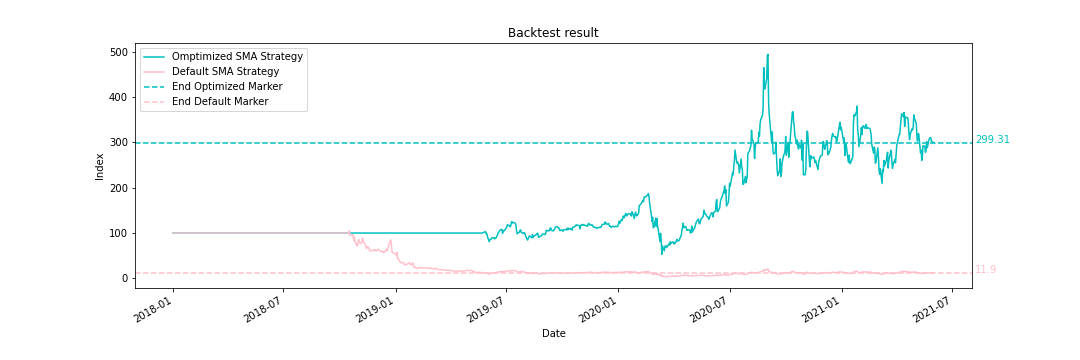

## Table
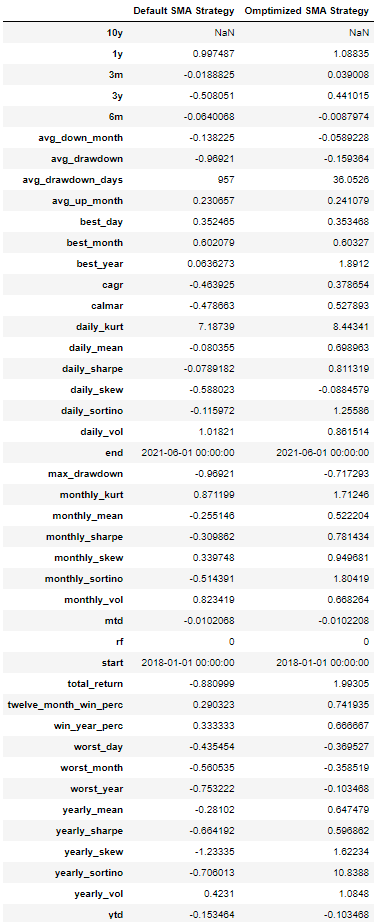

In [10]:
import bt
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [11]:
# getting ticker data
price_data = bt.get('fb, aapl, amzn, nflx', start='2018-1-1', end='2021-6-1')

In [12]:
# setting up SMAs
short = 10
long = 350

short_sma_df = price_data.rolling(short).mean()
long_sma_df = price_data.rolling(long).mean()

sma_50_df = price_data.rolling(50).mean()
sma_200_df = price_data.rolling(200).mean()

# Create the signals DF
signal = sma_200_df.copy()
signal[sma_200_df.isnull()] = 0

# Define the signal
signal[sma_50_df > sma_200_df] = .25
signal[sma_50_df < sma_200_df] = -.25

my_signal = long_sma_df.copy()
my_signal[long_sma_df.isnull()] = 0

# Define the signal
my_signal[short_sma_df > long_sma_df] = .25
my_signal[short_sma_df < long_sma_df] = -.25

In [13]:
# Constructing strategies
bt_strategy = bt.Strategy('Default SMA Strategy',
                          [bt.algos.WeighTarget(signal),
                           bt.algos.Rebalance()])

my_bt_strategy = bt.Strategy('Optimized SMA Strategy',
                          [bt.algos.WeighTarget(my_signal),
                           bt.algos.Rebalance()])

In [14]:
# backtesting strategies against the stock price data
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)

my_bt_backtest = bt.Backtest(my_bt_strategy, price_data)
my_bt_result = bt.run(my_bt_backtest)

In [15]:
# Merging the backtest dataframes to plot
strategy_df = bt.merge(my_bt_result.prices, bt_result.prices)

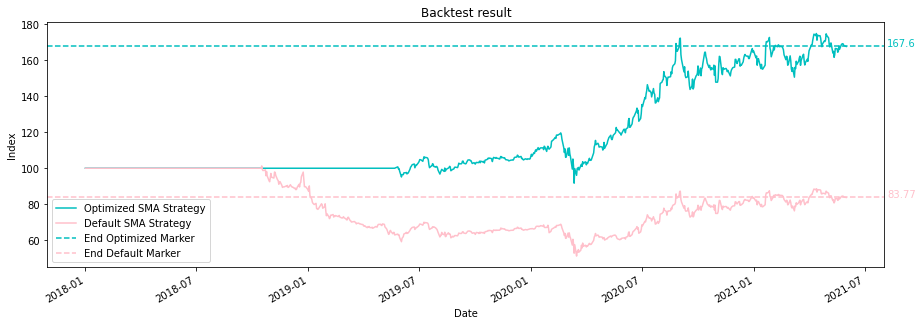

In [16]:
# Plotting backtests
strategy_df.plot(title='Backtest result', color=['c','pink'], figsize=(15,5))
plt.axhline(y=strategy_df.iloc[-1,0], color='c', linestyle='--', label='End Optimized Marker')
plt.text('2021-8-7',round(strategy_df.iloc[-1,0],2),round(strategy_df.iloc[-1,0], 2), color='c')

plt.axhline(y=strategy_df.iloc[-1,1], color='pink', linestyle='--', label='End Default Marker')
plt.text('2021-8-7',round(strategy_df.iloc[-1,1], 2),round(strategy_df.iloc[-1,1], 2), color='pink')

plt.ylabel('Index')
plt.xlabel('Date')
plt.legend()
# Uncomment below 2 lines to save plot in assets folder in root
# os.makedirs('./assets', exist_ok=True)
# plt.savefig('./assets/hw_2_1')
plt.show()

In [17]:
# Combining the results of all different SMAs into a dataframe
display_df = bt_result.lookback_returns.append(bt_result.stats)
display_df = display_df.join(my_bt_result.lookback_returns.append(my_bt_result.stats))
display_df = display_df.drop_duplicates()
display_df

,Default SMA Strategy,Optimized SMA Strategy
10y,NaN,NaN
1y,0.367109,0.381256
3m,0.0175586,0.0321625
3y,-0.0572951,0.187794
6m,0.0296897,0.0445648
avg_down_month,-0.0324867,-0.0111521
avg_drawdown,-0.493951,-0.0453253
avg_drawdown_days,957,25.5
avg_up_month,0.0549659,0.0613722
best_day,0.088211,0.0882862


In [18]:
# ########################################################################
# # Loop to search for the best performing SMA commented out to save effort
# ########################################################################

# short_range = np.arange(10,40,5)
# long_range = np.arange(150,400,20)

# short_strat_array = pd.DataFrame()
# bt_return = 0 
# for short in short_range:
#     for long in long_range:
#         short_sma_df_temp = price_data.rolling(short).mean()
#         long_sma_df_temp = price_data.rolling(long).mean()
        
#         # Create the signals DF
#         signal = long_sma_df_temp.copy()
#         signal[long_sma_df_temp.isnull()] = 0

#         # Define the signal
#         signal[short_sma_df_temp > long_sma_df_temp] = 1
#         signal[short_sma_df_temp < long_sma_df_temp] = -1
 
        
#         bt_short_strategy1 = bt.Strategy(f'{short}_{long}_SMA',
#                                     [bt.algos.WeighTarget(signal),
#                                      bt.algos.Rebalance()])

#         bt_short_backtest1 = bt.Backtest(bt_short_strategy1, price_data)
#         bt_short_result1 = bt.run(bt_short_backtest1)
#         short_strat_array = bt.merge(short_strat_array, bt_short_result1.prices)
        
# short_strat_array.plot(title='My SMA Backtests vs 200 and 50 SMA', # plotting backtest output
#                     figsize=(15,5))  


In [19]:
bt_result.get_security_weights()

,fb,aapl,amzn,nflx
2018-01-01,0.000000,0.000000,0.000000,0.000000
2018-01-02,0.000000,0.000000,0.000000,0.000000
2018-01-03,0.000000,0.000000,0.000000,0.000000
2018-01-04,0.000000,0.000000,0.000000,0.000000
2018-01-05,0.000000,0.000000,0.000000,0.000000
2018-01-08,0.000000,0.000000,0.000000,0.000000
2018-01-09,0.000000,0.000000,0.000000,0.000000
2018-01-10,0.000000,0.000000,0.000000,0.000000
2018-01-11,0.000000,0.000000,0.000000,0.000000
2018-01-12,0.000000,0.000000,0.000000,0.000000
